# Prepare MR-NIRP_Indoor dataset for easier loading

In [1]:
import os
import glob
import numpy as np
import cv2
import scipy.io as sio
import scipy.signal as sig
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
dataset_root_path: str = '/mnt/Data/MR-NIRP_Indoor/'
img_resize_h: int = 128
img_resize_w: int = 128
img_max_value: int = 2 ** 16 - 1  # 16-bit
video_fps: float = 30.
ppg_fps: float = 60.

The original subfolders name under Subject2_still_940 is wrong,
"cam_flea3_1" should be "RGB" and "RGB" should be "NIR", which have been corrected manually.

In [3]:
for subject_folder in tqdm(glob.glob(os.path.join(dataset_root_path, '*'))):
    if not os.path.isdir(subject_folder):
        continue

    subject_name = os.path.basename(subject_folder)
    print('Processing subject: {}'.format(subject_name))

    nir_path_list = sorted(glob.glob(os.path.join(subject_folder, "NIR", "*.pgm")))

    nir_img_list = []
    for nir_path in nir_path_list:
        nir_img = cv2.imread(nir_path, cv2.IMREAD_UNCHANGED)
        nir_img = cv2.resize(nir_img, (img_resize_w, img_resize_h), interpolation=cv2.INTER_AREA)
        nir_img = nir_img.astype(np.float32) / img_max_value  # Normalize to [0, 1]
        nir_img_list.append(nir_img)
    nir_img_array = np.array(nir_img_list)
    print(f"{nir_img_array.shape=}, {nir_img_array.dtype=}, {nir_img_array.min()=}, {nir_img_array.max()=}")

    ppg_mat = sio.loadmat(os.path.join(subject_folder, "PulseOX", "pulseOx.mat"))
    ppg_signal_corrupted = ppg_mat["pulseOxRecord"].squeeze()
    ppg_time_corrupted = ppg_mat["pulseOxTime"][0]
    ppg_signal, ppg_time = [], []
    for idx, (value, time) in enumerate(zip(ppg_signal_corrupted, ppg_time_corrupted)):
        num_values = len(value[0]) if isinstance(value, np.ndarray) else 1
        if num_values > 1:  # Multiple values at a time step due to queued delayed ppg signal
            for sub_idx, sub_value in enumerate(value[0]):
                ppg_time.append(ppg_time_corrupted[idx-1] + ((sub_idx+1) / num_values) * (time - ppg_time_corrupted[idx-1]))
                ppg_signal.append(sub_value)
        else:
            ppg_time.append(time)
            ppg_signal.append(value.item())
    ppg_signal = np.array(ppg_signal)
    ppg_time = np.array(ppg_time)

    npz_path = os.path.join(dataset_root_path, f"{subject_name}.npz")
    np.savez(npz_path, nir_img_array=nir_img_array, ppg_signal=ppg_signal, ppg_time=ppg_time)

  0%|          | 0/31 [00:00<?, ?it/s]

Processing subject: Subject6_still_940
nir_img_array.shape=(5812, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.070160985, nir_img_array.max()=0.6118105


  3%|▎         | 1/31 [00:11<05:32, 11.07s/it]

Processing subject: Subject2_still_940
nir_img_array.shape=(6310, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.048950944, nir_img_array.max()=0.64853895


  6%|▋         | 2/31 [00:36<09:25, 19.51s/it]

Processing subject: Subject4_still_940
nir_img_array.shape=(5411, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.04789807, nir_img_array.max()=0.78959334


 13%|█▎        | 4/31 [00:58<06:26, 14.31s/it]

Processing subject: Subject4_motion_940
nir_img_array.shape=(1847, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.047486078, nir_img_array.max()=0.9010758


 16%|█▌        | 5/31 [01:05<05:12, 12.02s/it]

Processing subject: Subject3_still_940
nir_img_array.shape=(7230, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.046707865, nir_img_array.max()=0.75344473


 23%|██▎       | 7/31 [01:35<05:19, 13.30s/it]

Processing subject: Subject8_motion_940
nir_img_array.shape=(1826, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.050598916, nir_img_array.max()=0.96247804


 32%|███▏      | 10/31 [01:42<02:43,  7.81s/it]

Processing subject: Subject3_motion_940
nir_img_array.shape=(1817, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.044235904, nir_img_array.max()=0.62043184


 39%|███▊      | 12/31 [01:49<02:01,  6.41s/it]

Processing subject: Subject6_motion_940
nir_img_array.shape=(1815, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.06802472, nir_img_array.max()=0.69892424


 42%|████▏     | 13/31 [01:56<01:57,  6.54s/it]

Processing subject: Subject8_still_940
nir_img_array.shape=(5422, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.052689403, nir_img_array.max()=0.89504844


 45%|████▌     | 14/31 [02:19<02:50, 10.03s/it]

Processing subject: Subject2_motion_940
nir_img_array.shape=(1821, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.049546044, nir_img_array.max()=0.6962844


 48%|████▊     | 15/31 [02:26<02:28,  9.31s/it]

Processing subject: Subject1_still_940
nir_img_array.shape=(5386, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.038773175, nir_img_array.max()=0.6774395


 55%|█████▍    | 17/31 [02:47<02:17,  9.83s/it]

Processing subject: Subject7_still_940
nir_img_array.shape=(5413, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.067338064, nir_img_array.max()=0.84757763


 65%|██████▍   | 20/31 [03:10<01:37,  8.83s/it]

Processing subject: Subject5_still_940
nir_img_array.shape=(5415, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.08453498, nir_img_array.max()=0.6352026


 68%|██████▊   | 21/31 [03:33<01:53, 11.38s/it]

Processing subject: Subject7_motion_940
nir_img_array.shape=(1824, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.06582742, nir_img_array.max()=0.8135042


 71%|███████   | 22/31 [03:40<01:34, 10.50s/it]

Processing subject: Subject1_motion_940
nir_img_array.shape=(1967, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.03994812, nir_img_array.max()=0.7066453


100%|██████████| 31/31 [03:48<00:00,  7.36s/it]


Each *.npz:
- nir_img_array.shape = (t@30fps, h=img_resize_h, w=img_resize_w)
- ppg_signal = (t'@60fps,)
- ppg_signal = (t'@60fps,)

Loading /mnt/Data/MR-NIRP_Indoor/Subject6_still_940.npz
nir_img_array.shape=(5812, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.070160985, nir_img_array.max()=0.6118105
ppg_signal.shape=(10773,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=9, ppg_signal.max()=102
ppg_time.shape=(10773,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1518987793.190641, ppg_time.max()=1518987973.739428


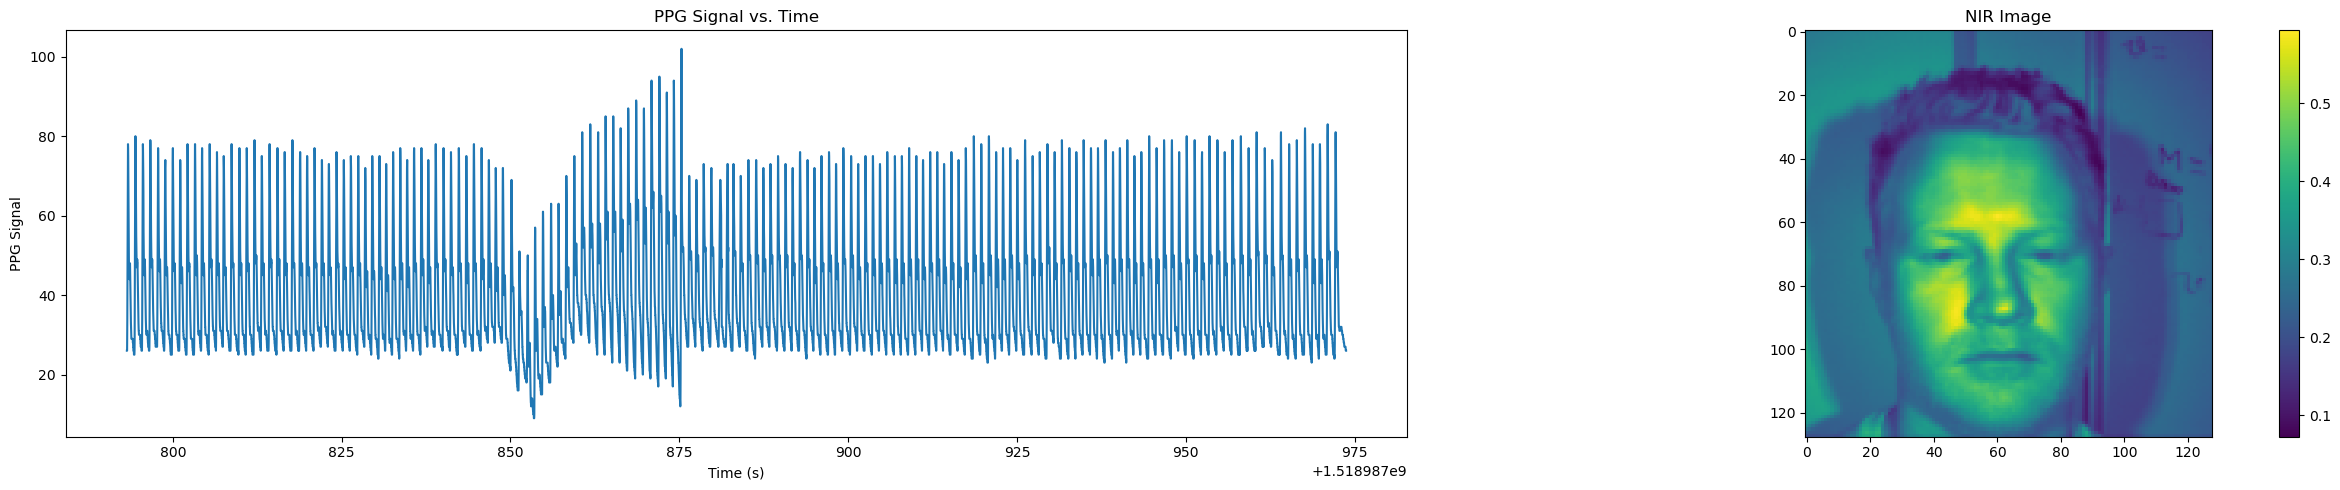

Loading /mnt/Data/MR-NIRP_Indoor/Subject2_still_940.npz
nir_img_array.shape=(6310, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.048950944, nir_img_array.max()=0.64853895
ppg_signal.shape=(12599,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=0, ppg_signal.max()=78
ppg_time.shape=(12599,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519084234.486923, ppg_time.max()=1519084444.883562


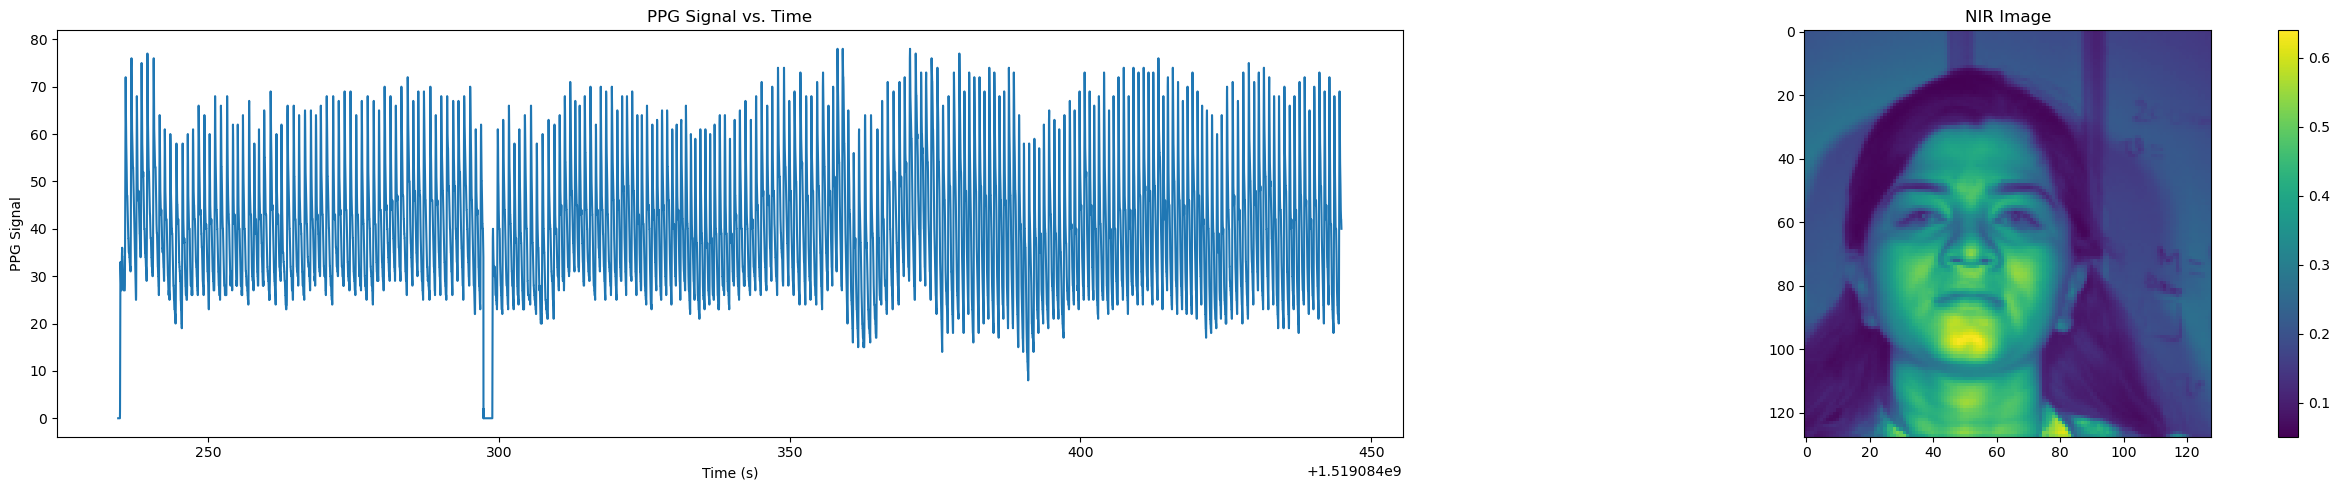

Loading /mnt/Data/MR-NIRP_Indoor/Subject5_still_940.npz
nir_img_array.shape=(5415, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.08453498, nir_img_array.max()=0.6352026
ppg_signal.shape=(10813,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=20, ppg_signal.max()=109
ppg_time.shape=(10813,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519071639.565325, ppg_time.max()=1519071820.093296


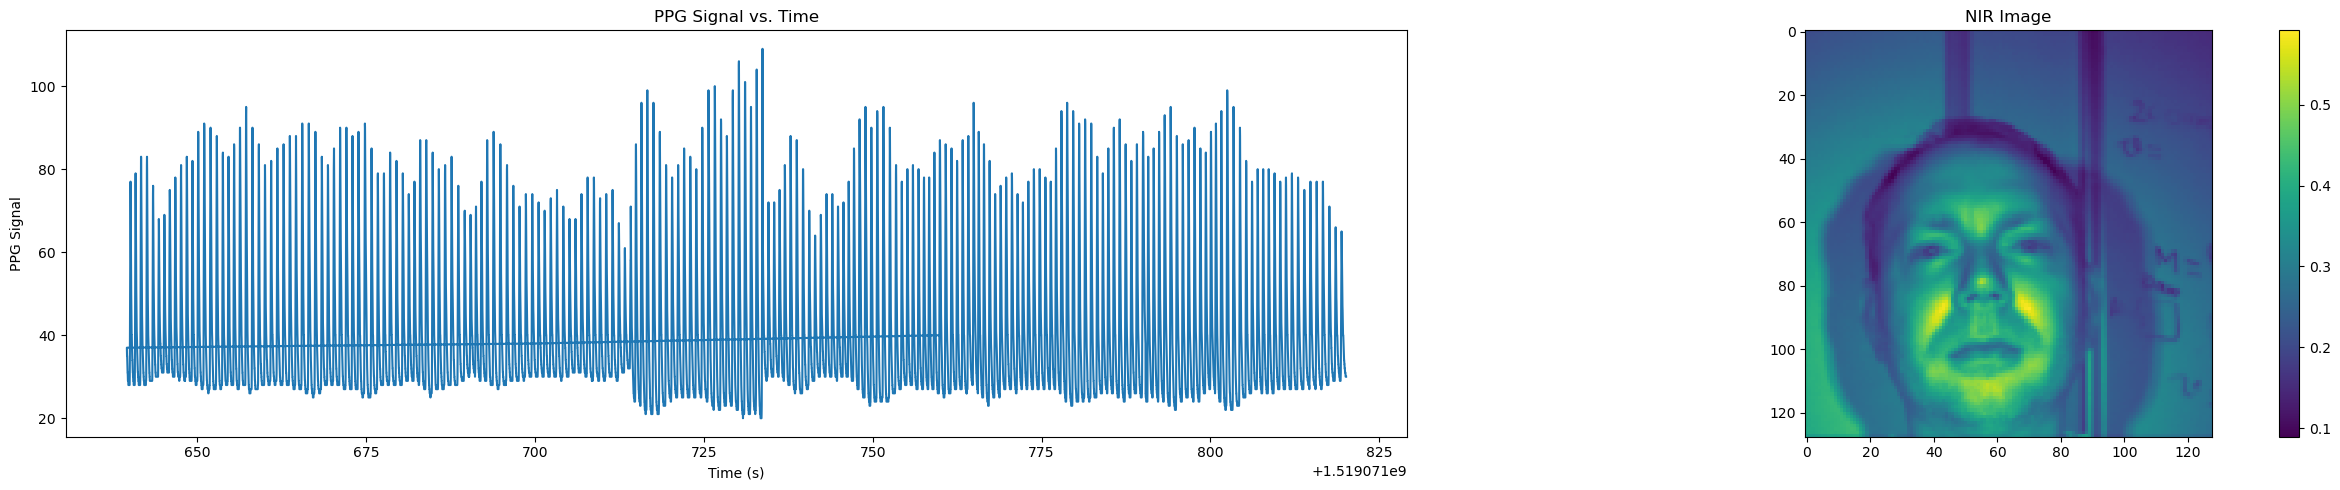

Loading /mnt/Data/MR-NIRP_Indoor/Subject8_still_940.npz
nir_img_array.shape=(5422, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.052689403, nir_img_array.max()=0.89504844
ppg_signal.shape=(10796,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=0, ppg_signal.max()=103
ppg_time.shape=(10796,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519074359.050833, ppg_time.max()=1519074539.336365


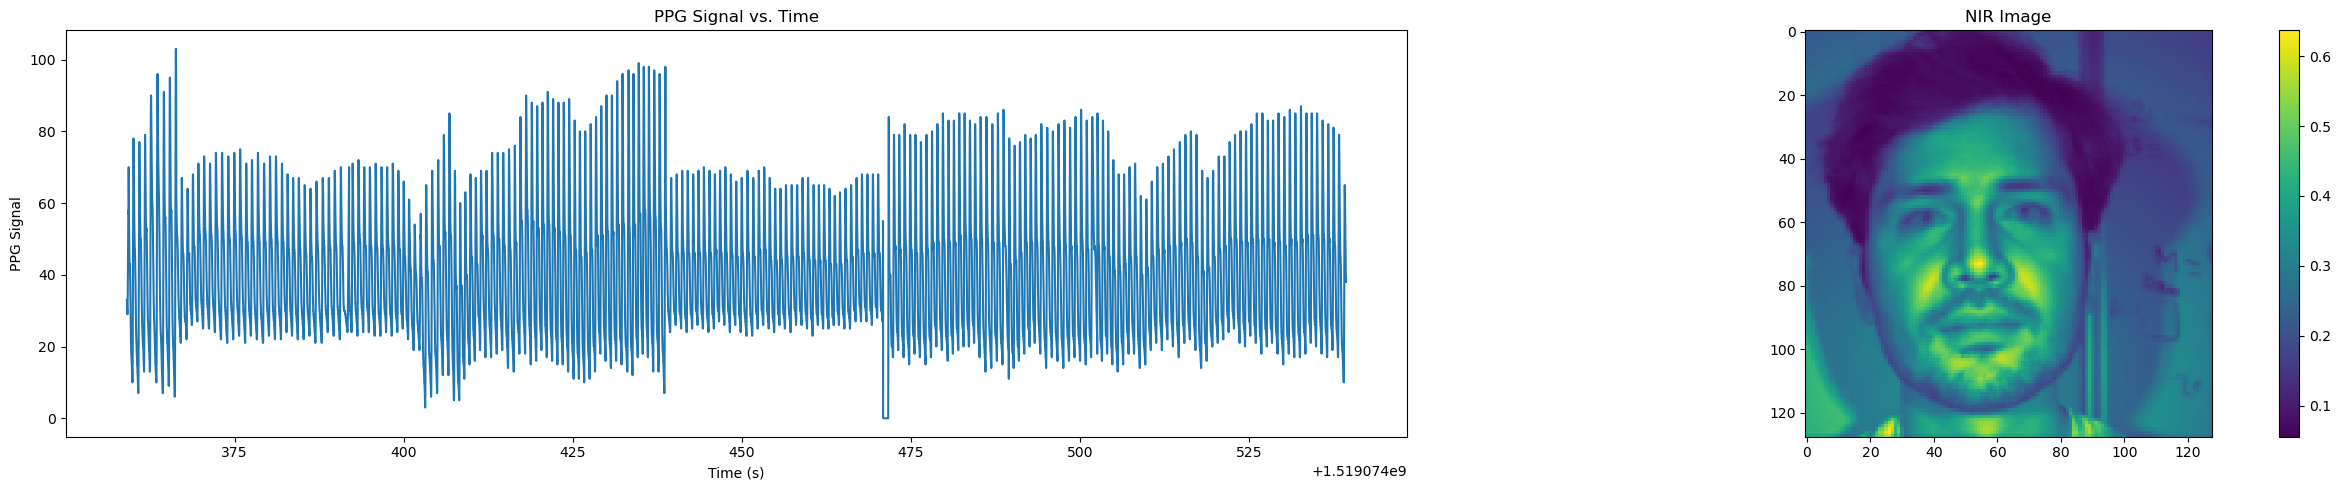

Loading /mnt/Data/MR-NIRP_Indoor/Subject8_motion_940.npz
nir_img_array.shape=(1826, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.050598916, nir_img_array.max()=0.96247804
ppg_signal.shape=(3645,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=0, ppg_signal.max()=92
ppg_time.shape=(3645,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519074856.770411, ppg_time.max()=1519074917.628251


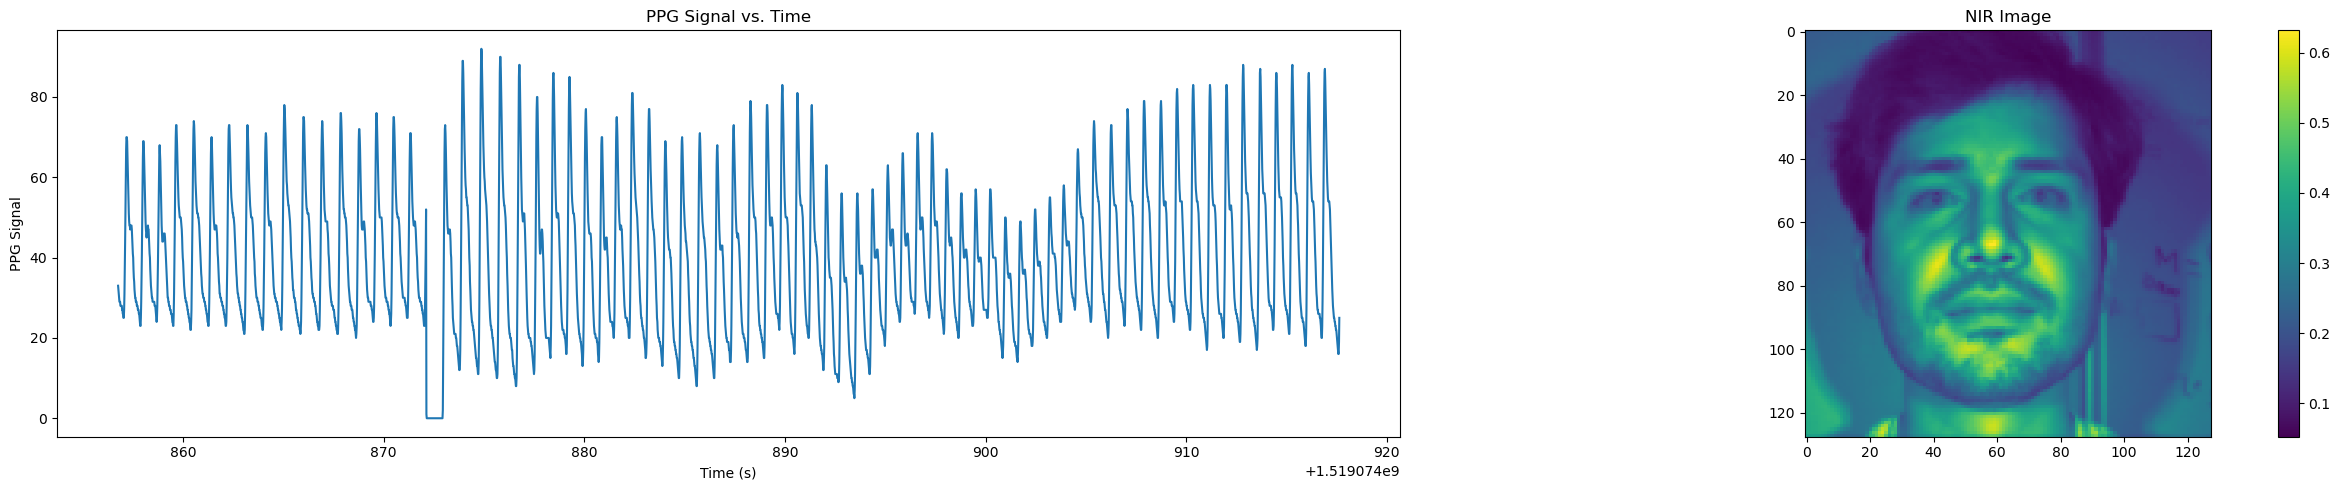

Loading /mnt/Data/MR-NIRP_Indoor/Subject6_motion_940.npz
nir_img_array.shape=(1815, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.06802472, nir_img_array.max()=0.69892424
ppg_signal.shape=(3623,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=22, ppg_signal.max()=88
ppg_time.shape=(3623,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1518988273.248452, ppg_time.max()=1518988333.73562


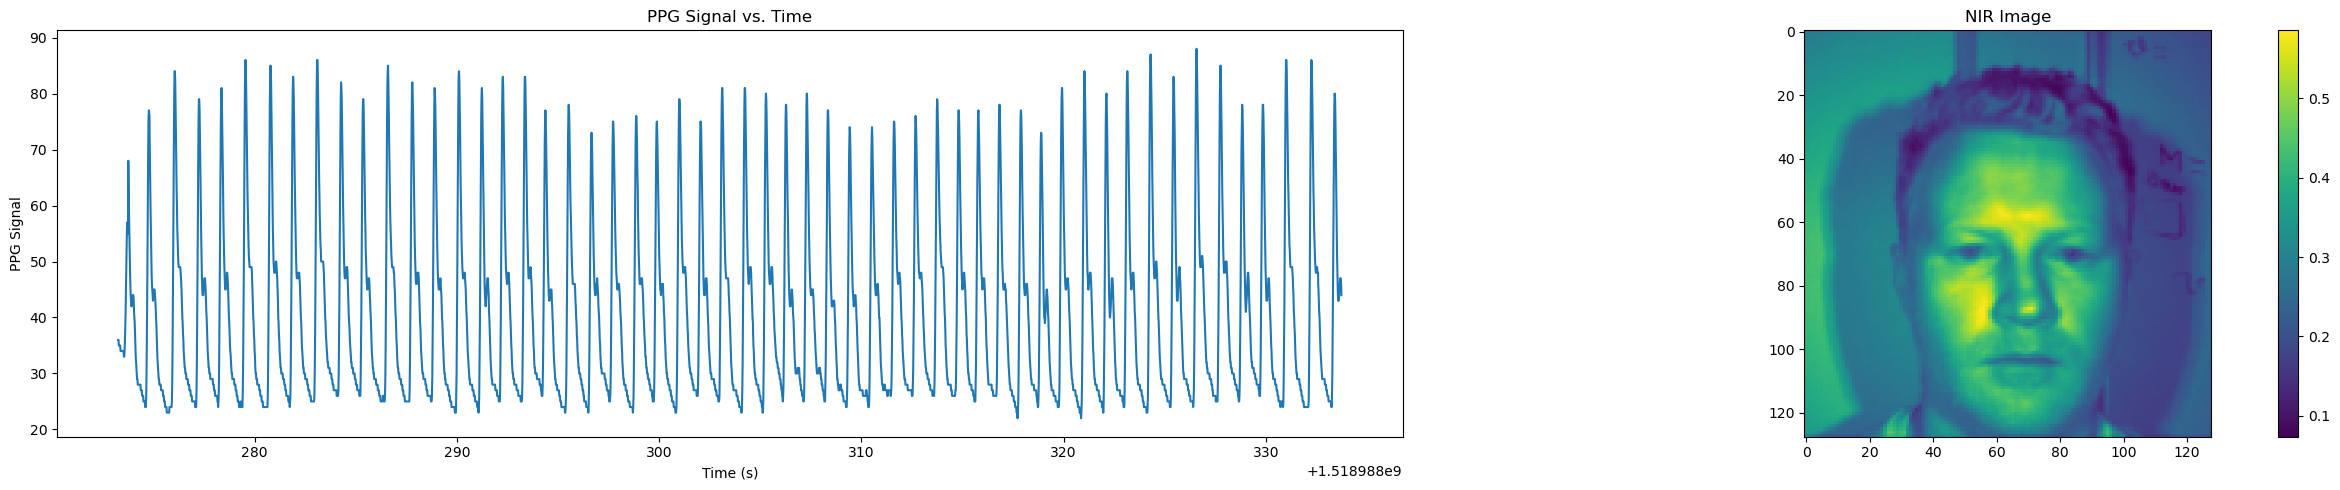

Loading /mnt/Data/MR-NIRP_Indoor/Subject7_motion_940.npz
nir_img_array.shape=(1824, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.06582742, nir_img_array.max()=0.8135042
ppg_signal.shape=(3640,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=0, ppg_signal.max()=108
ppg_time.shape=(3640,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519077623.385428, ppg_time.max()=1519077684.160324


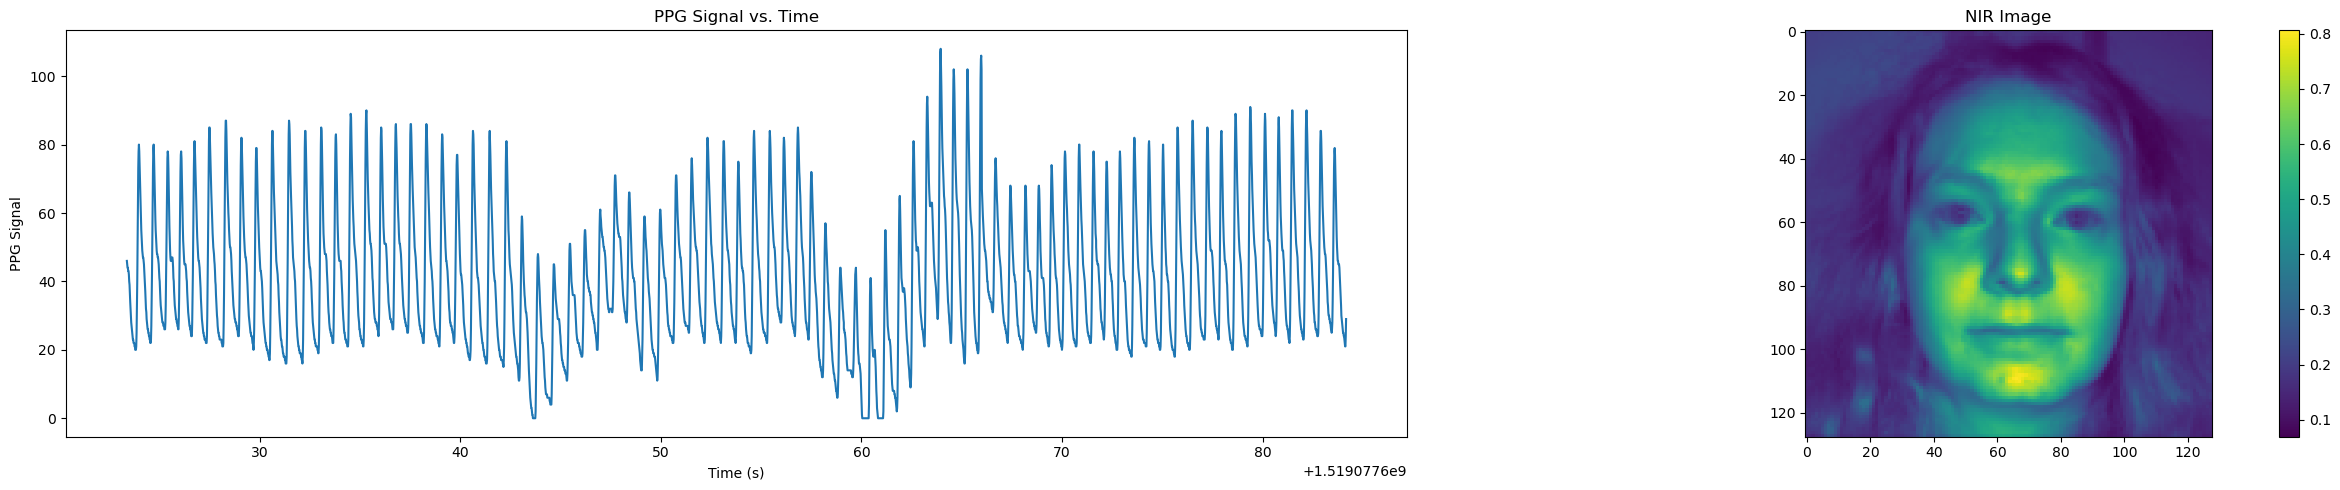

Loading /mnt/Data/MR-NIRP_Indoor/Subject7_still_940.npz
nir_img_array.shape=(5413, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.067338064, nir_img_array.max()=0.84757763
ppg_signal.shape=(10809,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=0, ppg_signal.max()=94
ppg_time.shape=(10809,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519077361.366078, ppg_time.max()=1519077541.868629


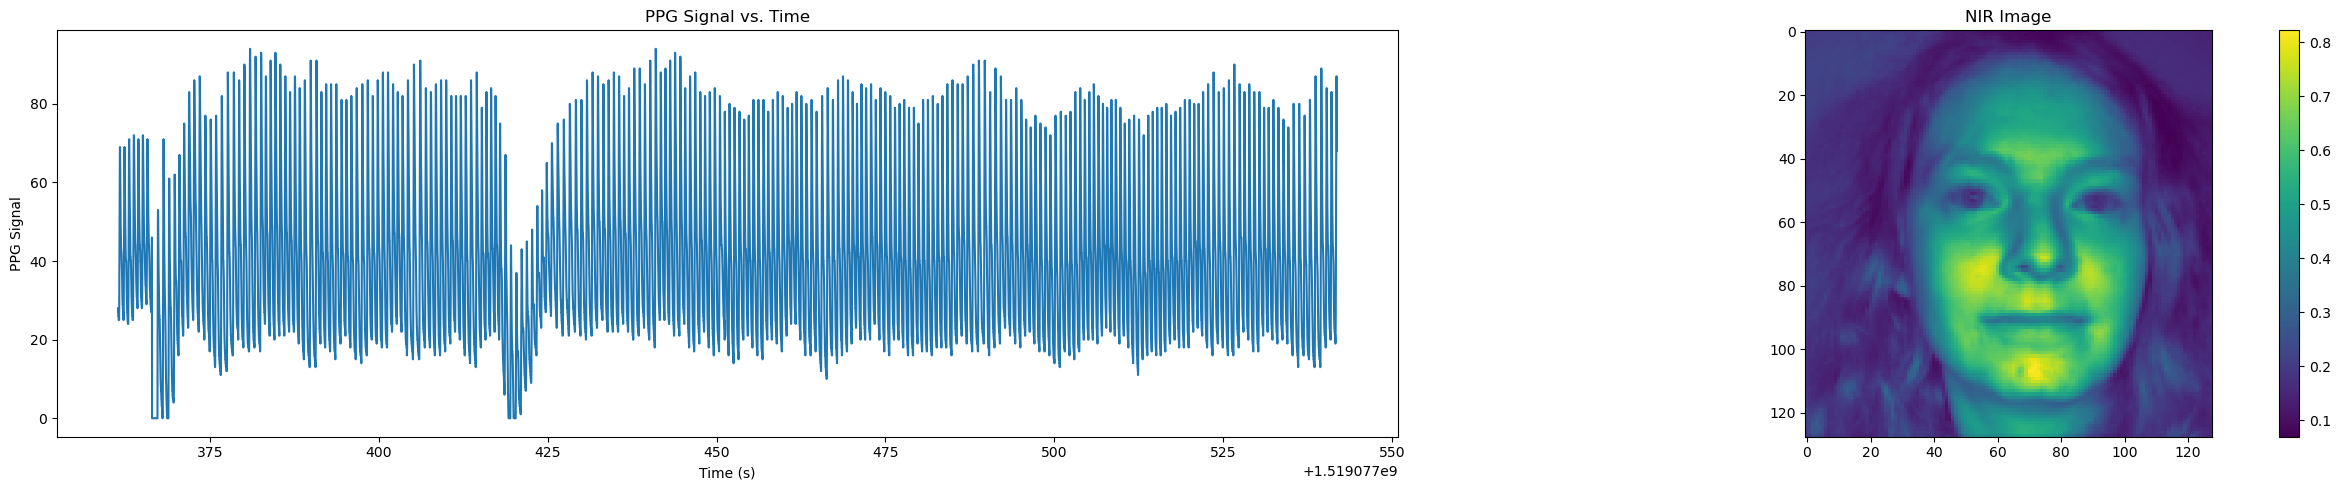

Loading /mnt/Data/MR-NIRP_Indoor/Subject1_still_940.npz
nir_img_array.shape=(5386, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.038773175, nir_img_array.max()=0.6774395
ppg_signal.shape=(10755,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=0, ppg_signal.max()=110
ppg_time.shape=(10755,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519076625.615809, ppg_time.max()=1519076805.217247


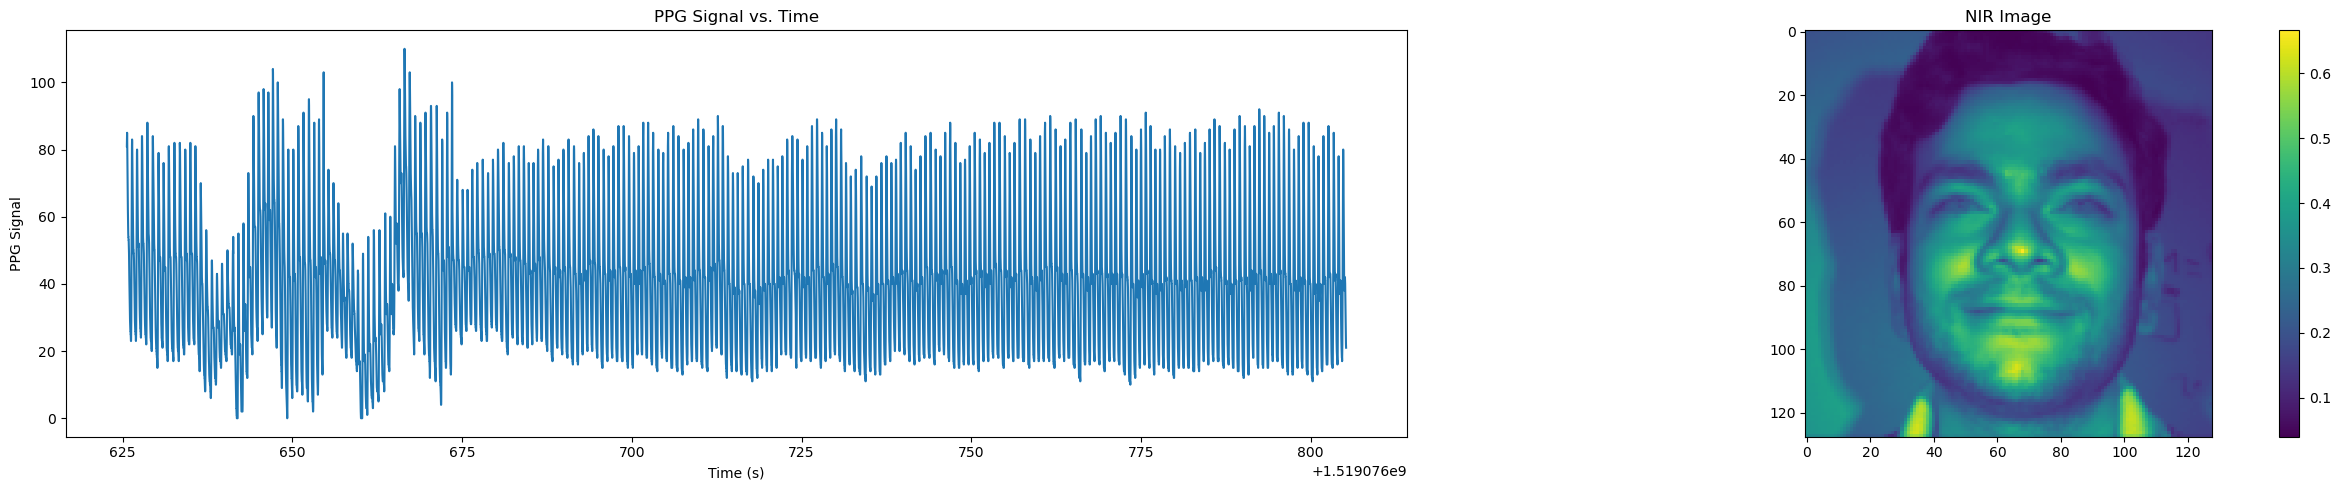

Loading /mnt/Data/MR-NIRP_Indoor/Subject3_still_940.npz
nir_img_array.shape=(7230, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.046707865, nir_img_array.max()=0.75344473
ppg_signal.shape=(14440,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=0, ppg_signal.max()=112
ppg_time.shape=(14440,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519082847.056292, ppg_time.max()=1519083088.199277


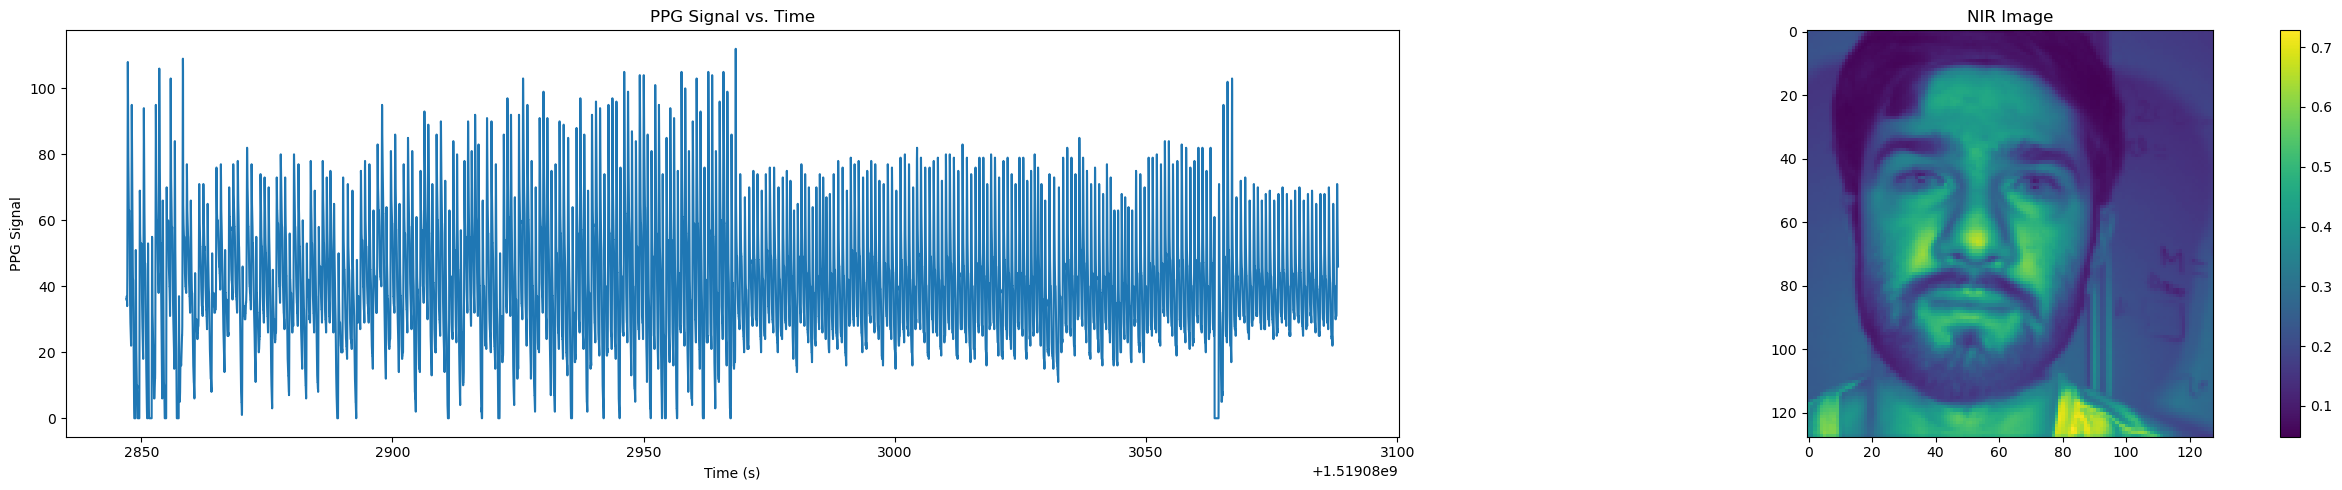

Loading /mnt/Data/MR-NIRP_Indoor/Subject3_motion_940.npz
nir_img_array.shape=(1817, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.044235904, nir_img_array.max()=0.62043184
ppg_signal.shape=(3628,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=0, ppg_signal.max()=112
ppg_time.shape=(3628,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519084006.244459, ppg_time.max()=1519084066.813915


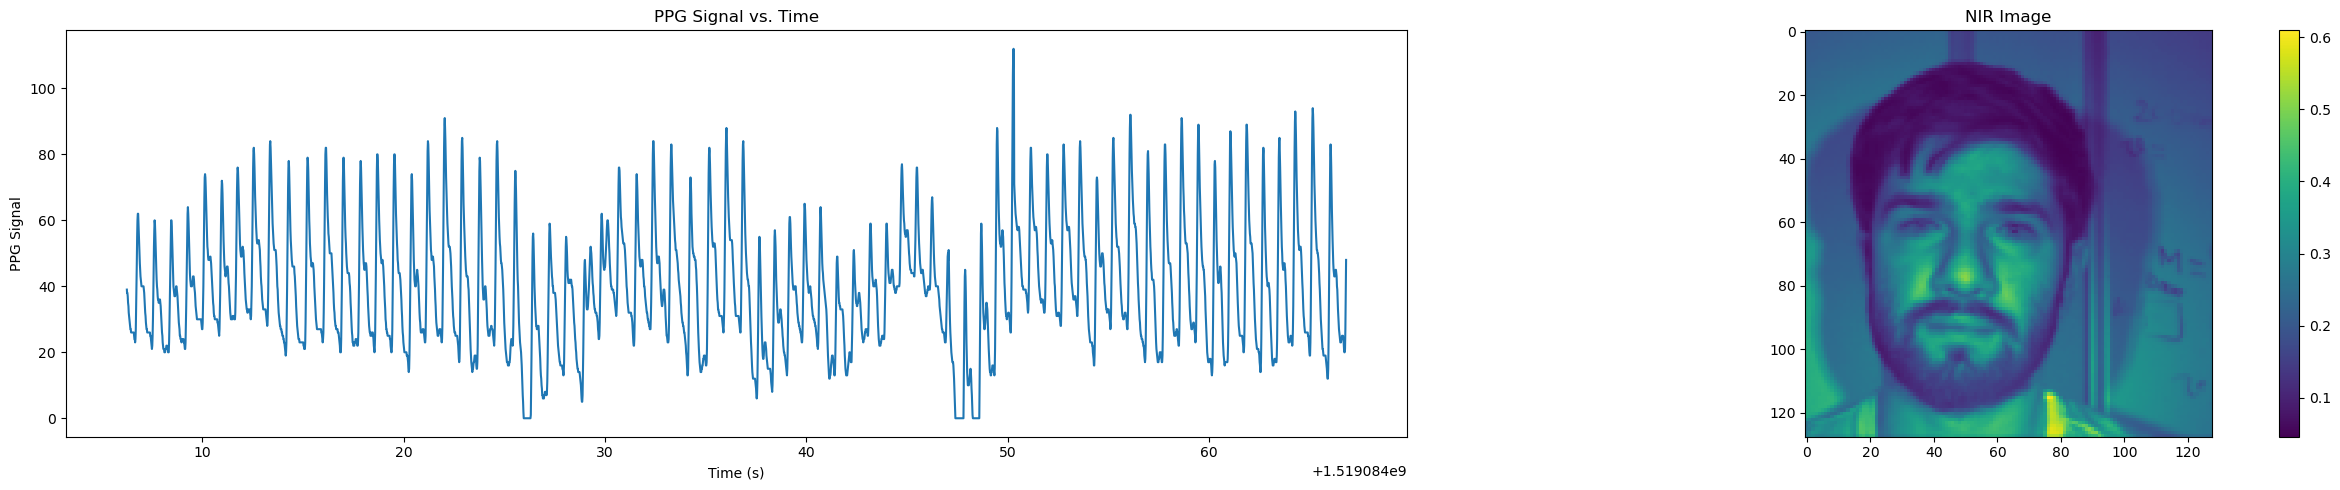

Loading /mnt/Data/MR-NIRP_Indoor/Subject1_motion_940.npz
nir_img_array.shape=(1967, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.03994812, nir_img_array.max()=0.7066453
ppg_signal.shape=(3929,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=0, ppg_signal.max()=104
ppg_time.shape=(3929,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519076918.648566, ppg_time.max()=1519076984.249431


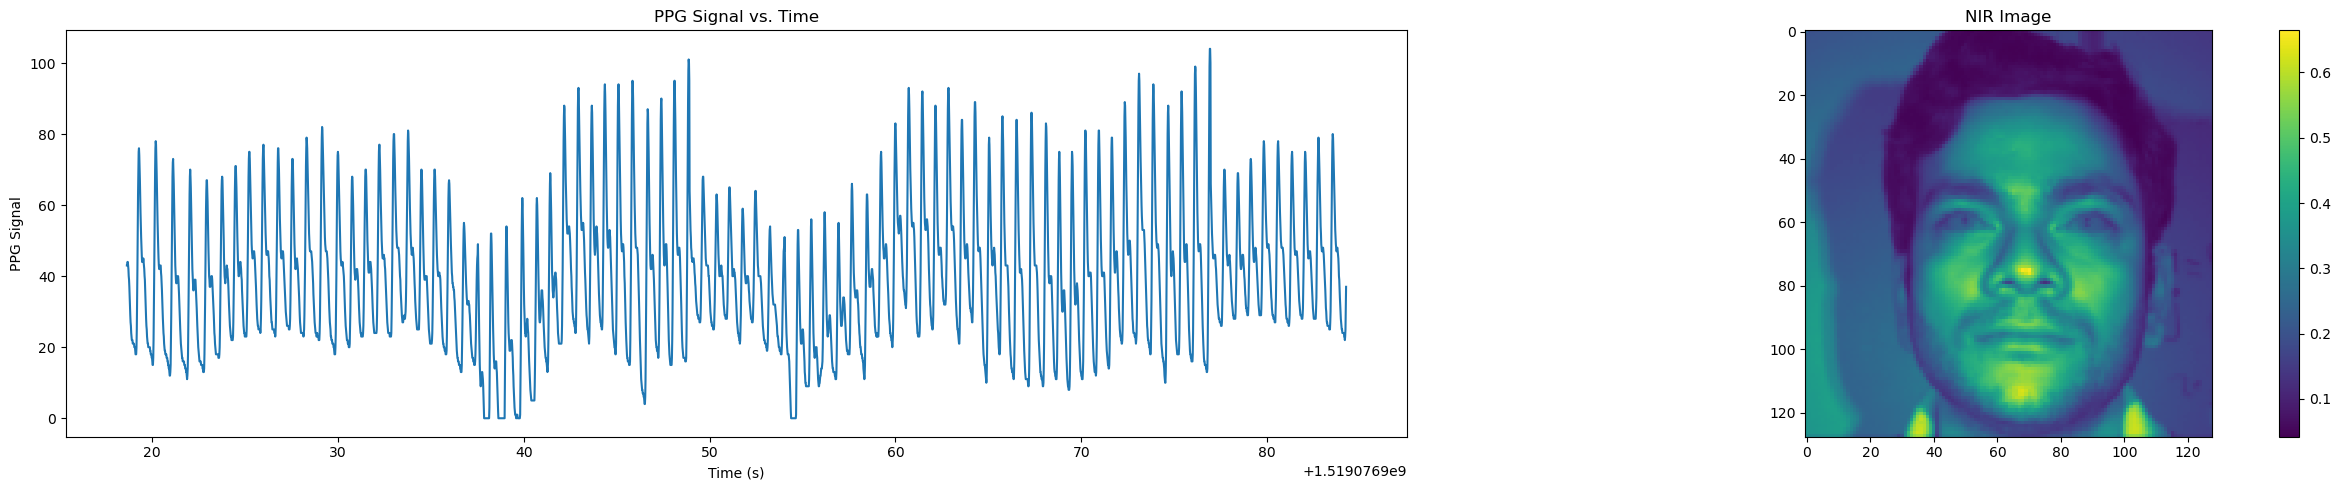

Loading /mnt/Data/MR-NIRP_Indoor/Subject2_motion_940.npz
nir_img_array.shape=(1821, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.049546044, nir_img_array.max()=0.6962844
ppg_signal.shape=(3643,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=0, ppg_signal.max()=96
ppg_time.shape=(3643,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519084528.462929, ppg_time.max()=1519084589.28734


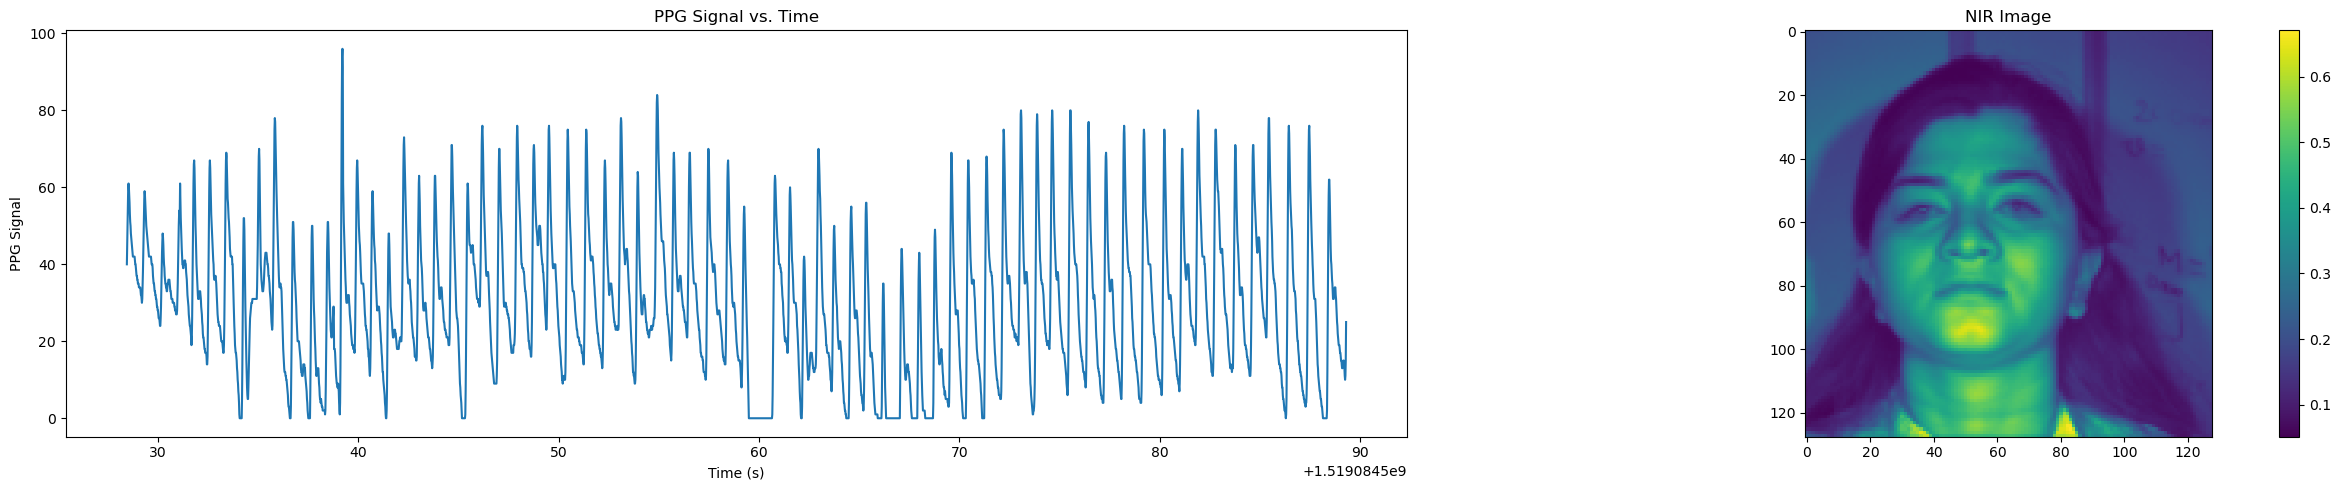

Loading /mnt/Data/MR-NIRP_Indoor/Subject4_motion_940.npz
nir_img_array.shape=(1847, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.047486078, nir_img_array.max()=0.9010758
ppg_signal.shape=(3686,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=0, ppg_signal.max()=101
ppg_time.shape=(3686,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519068696.850391, ppg_time.max()=1519068758.392944


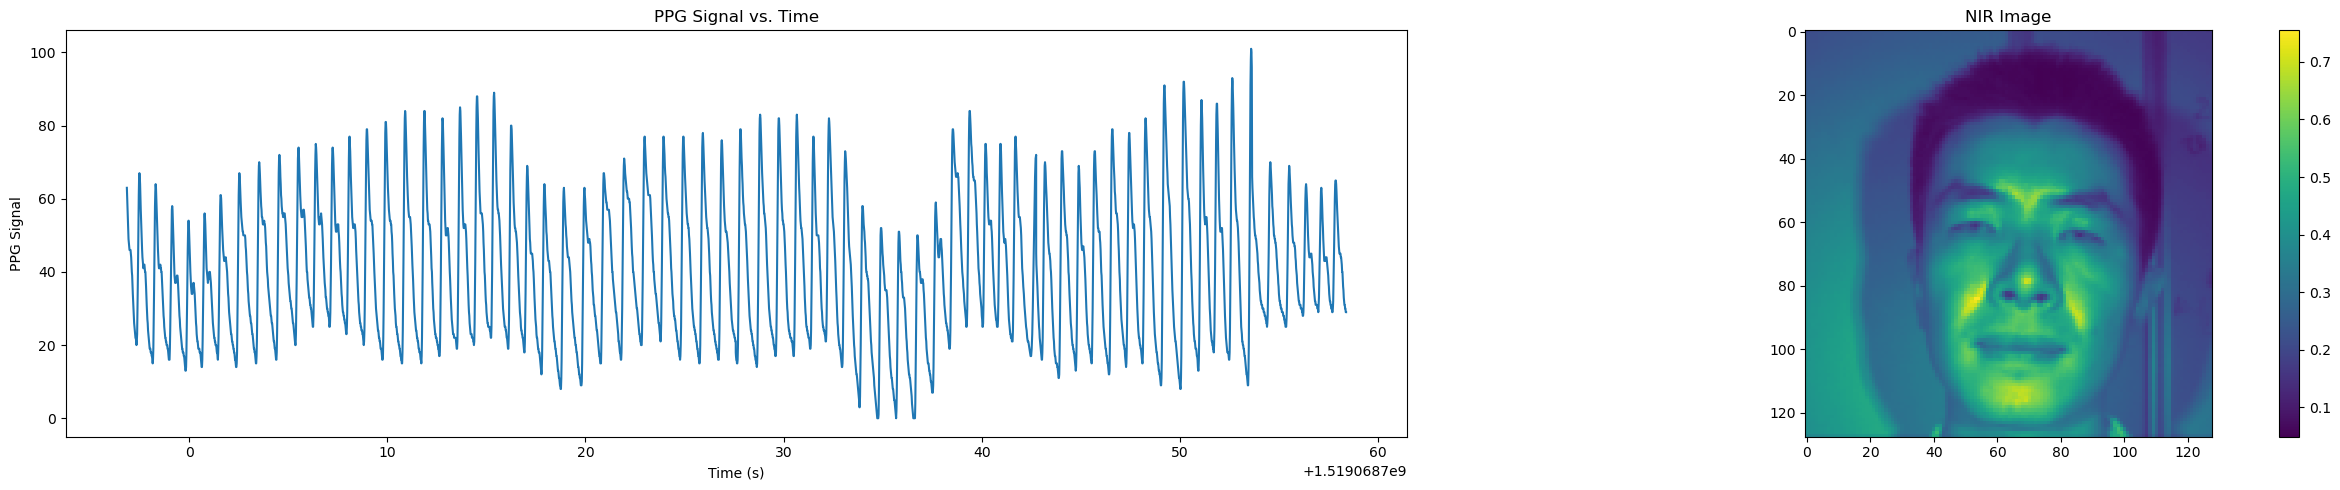

Loading /mnt/Data/MR-NIRP_Indoor/Subject4_still_940.npz
nir_img_array.shape=(5411, 128, 128), nir_img_array.dtype=dtype('float32'), nir_img_array.min()=0.04789807, nir_img_array.max()=0.78959334
ppg_signal.shape=(10806,), ppg_signal.dtype=dtype('int64'), ppg_signal.min()=15, ppg_signal.max()=89
ppg_time.shape=(10806,), ppg_time.dtype=dtype('float64'), ppg_time.min()=1519068307.784869, ppg_time.max()=1519068488.239921


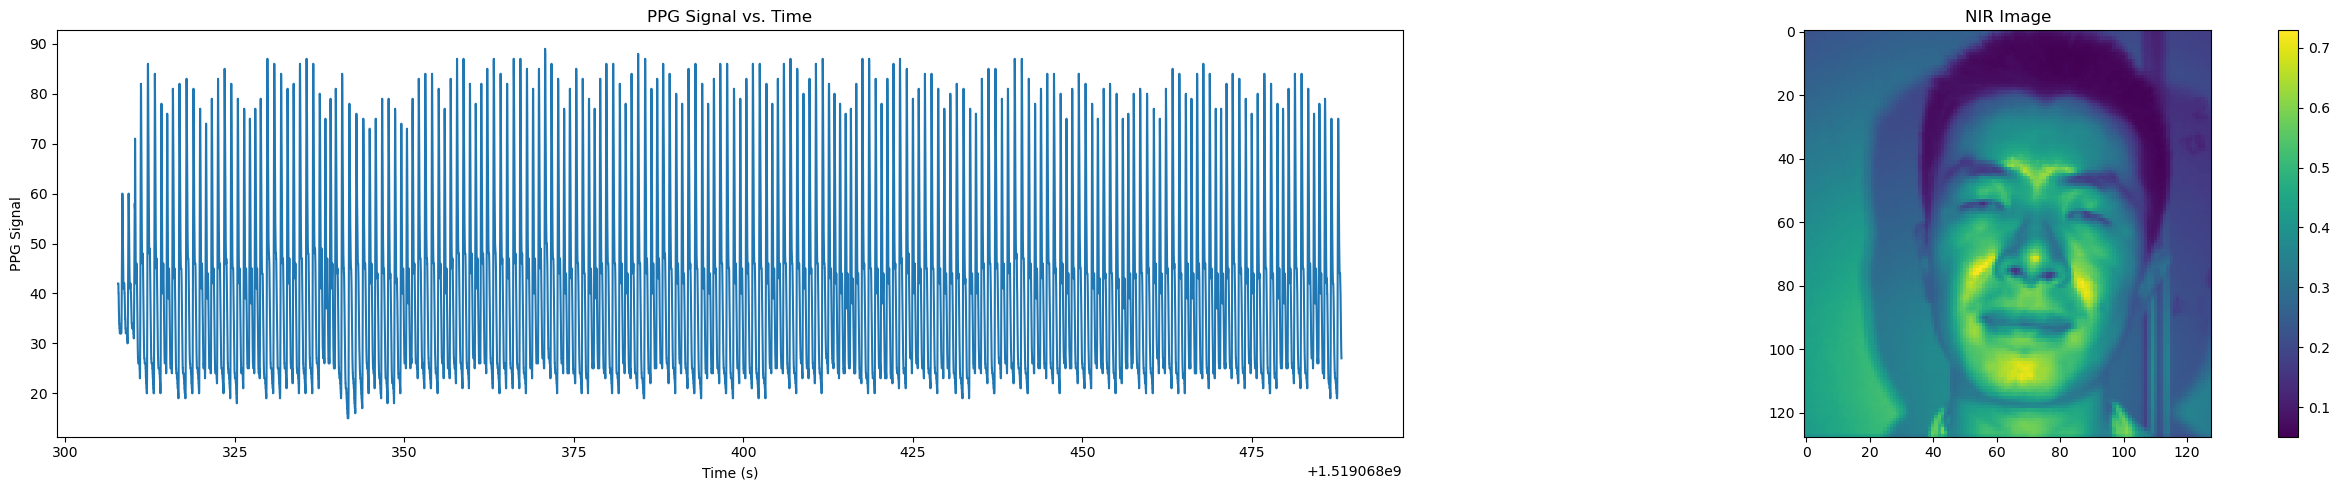

In [5]:
# Load each npz file and plot the first frame and the ppg signal
for subject_npz_path in glob.glob(os.path.join(dataset_root_path, "*.npz")):
    print(f"Loading {subject_npz_path}")
    subject_npz = np.load(subject_npz_path)
    nir_img_array = subject_npz["nir_img_array"]
    ppg_signal = subject_npz["ppg_signal"]
    ppg_time = subject_npz["ppg_time"]

    print(f"{nir_img_array.shape=}, {nir_img_array.dtype=}, {nir_img_array.min()=}, {nir_img_array.max()=}")
    print(f"{ppg_signal.shape=}, {ppg_signal.dtype=}, {ppg_signal.min()=}, {ppg_signal.max()=}")
    print(f"{ppg_time.shape=}, {ppg_time.dtype=}, {ppg_time.min()=}, {ppg_time.max()=}")

    # Plot the ppg signal and nir image in the first frame together
    plt.figure(figsize=(25, 5))
    plt.subplot(1, 2, 1)
    plt.plot(ppg_time, ppg_signal)
    plt.xlabel("Time (s)")
    plt.ylabel("PPG Signal")
    plt.title("PPG Signal vs. Time")
    plt.subplot(1, 2, 2)
    plt.imshow(nir_img_array[0])
    plt.title("NIR Image")
    plt.colorbar()
    plt.tight_layout()
    plt.show()